## Predictive Modelling of Eating-Out Problem
***
### Unit Code : 11523                                              
### Unit Name : Data Science Technology and Systems
### Student Id : u3220242
### Student Name : Vishal Mittal
### Submission Dt : 05/10/2022
***

## Prologue

***
### This project is about predictive modelling of eating-out problem. The main goal of the project is to predict the restraunts success in Sydney using different machine learning algorithms.

### The Sydney restraunts dataset contains 17 variables relating to restraunts rating, cuisine served, suburbs where the restraunts existed. The dataset contains the data for restraunts existing in Sydney area in 2018. A detailed description of the most variables in this dataset is given below.


| Column        | Description                                                 | 
| :---          | :----                                                       |
| address       | restaurant’s address (text)                                 |
| cost          | the average cost for two people in AUD (numeric)            |
| cuisine       | cuisines served by the restaurant (list)                    |
| lat           | Latitude (numeric)                                          |
| link          | Url (text)                                                  |
| lng           | longitude (numeric)                                         |
| phone         | phone number (numeric)                                      |
| rating_number | restaurant rating (numeric)                                 | 
| rating_text   | resturnat rating (text)                                     |
| subzone       | The suburb in which restaurant resides (text)               |
| title         | restaurant’s name (text)                                    |
| type          | business type (list)                                        |
| votes         | Number of users who provided the rating (numeric)           |
| groupon       | is the restaurant promoting itself on Groupon.com (boolean) |


### This project starts by answering a few questions such as: How many unique dishes are served by restaurants in Sydney? Are the highly rated restaurants expensive and the less rated ones cheap? Which parts of the city have the most restaurants? Exploratory data visualization techniques are employed to gain a deeper understanding of the data using different python libraries such as seaborn, pyplot, matplotlib etc. Columns are processed based on feature analysis and EDA. Based on the percentage of missing values, the column will be treated with NaN values. Based on our insight, we decided to perform predictive modeling by choosing a column function to predict the rating_number.
***

## Import the required libraries

In [365]:
# Used for reading the csv file as a pandas dataframe
import pandas as pd

# Used for performing mathematical and array operations
import numpy as np

# Used for plotting the plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [366]:
# Set dataset file location
dataset_file = "data/zomato_df_final_data.csv"

# Read the dataset file using pandas read_csv method
food_order_dataset = pd.read_csv(dataset_file)

print('Shape before deleting duplicate values:', food_order_dataset.shape)

# Removing duplicate rows if any
food_order_dataset = food_order_dataset.drop_duplicates()
print('Shape After deleting duplicate values:', food_order_dataset.shape)

# View the first few rows of the dataset using head() function
food_order_dataset.head(3)

Shape before deleting duplicate values: (10500, 17)
Shape After deleting duplicate values: (10499, 17)


address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   

                type   votes  groupon    color     cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2    ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b

## Check the data types of each column in the dataset

In [367]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
food_order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10499 non-null  object 
 1   cost           10153 non-null  float64
 2   cuisine        10499 non-null  object 
 3   lat            10307 non-null  float64
 4   link           10499 non-null  object 
 5   lng            10307 non-null  float64
 6   phone          10499 non-null  object 
 7   rating_number  7183 non-null   float64
 8   rating_text    7183 non-null   object 
 9   subzone        10499 non-null  object 
 10  title          10499 non-null  object 
 11  type           10451 non-null  object 
 12  votes          7183 non-null   float64
 13  groupon        10499 non-null  bool   
 14  color          10499 non-null  object 
 15  cost_2         10153 non-null  float64
 16  cuisine_color  10499 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

## Finding the percentage of missing data in each column in our dataset.

In [368]:
for column_name in food_order_dataset.columns:
    pct_missing = np.mean(food_order_dataset[column_name].isnull())
    print('{} - {}%'.format(column_name, round(pct_missing*100)))

address - 0%
cost - 3%
cuisine - 0%
lat - 2%
link - 0%
lng - 2%
phone - 0%
rating_number - 32%
rating_text - 32%
subzone - 0%
title - 0%
type - 0%
votes - 32%
groupon - 0%
color - 0%
cost_2 - 3%
cuisine_color - 0%


#### The above list shows the percentage of missing values of each features. Specifically we see that `rating_number`, `rating_text` and `votes` features each have 32% missing, while `cost` and `cost2` has 3% missing and `lng` has only 2% missing.

In [369]:
# Looking at the descriptive statistics of the data
food_order_dataset.describe(include='all')

address          cost  \
count                                               10499  10153.000000   
unique                                               9821           NaN   
top      Level 5, Westfield Pitt Street Mall, 188 Pitt...           NaN   
freq                                                   10           NaN   
mean                                                  NaN     51.153846   
std                                                   NaN     27.800787   
min                                                   NaN      8.000000   
25%                                                   NaN     30.000000   
50%                                                   NaN     45.000000   
75%                                                   NaN     60.000000   
max                                                   NaN    500.000000   

         cuisine           lat  \
count      10499  10307.000000   
unique      1759           NaN   
top     ['Cafe']           NaN   
freq        1745           NaN   
mean         NaN    -32.921292   
std          NaN      8.263845   
min          NaN    -37.858473   
25%          NaN    -33.899095   
50%          NaN    -33.872743   
75%          NaN    -33.813456   
max          NaN     51.500986   

                                                   link           lng  \
count                                             10499  10307.000000   
unique                                            10499           NaN   
top     https://www.zomato.com/sydney/sydney-madang-cbd           NaN   
freq                                                  1           NaN   
mean                                                NaN    148.067056   
std                                                 NaN     26.696679   
min                                                 NaN   -123.270371   
25%                                                 NaN    151.060890   
50%                                                 NaN    151.172468   
75%                                                 NaN    151.208942   
max                                                 NaN    152.869052   

                               phone  rating_number rating_text subzone  \
count                          10499    7183.000000        7183   10499   
unique                          9638            NaN           5     572   
top     Not available for this place            NaN     Average     CBD   
freq                             636            NaN        4501     476   
mean                             NaN       3.283614         NaN     NaN   
std                              NaN       0.454585         NaN     NaN   
min                              NaN       1.800000         NaN     NaN   
25%                              NaN       3.000000         NaN     NaN   
50%                              NaN       3.300000         NaN     NaN   
75%                              NaN       3.600000         NaN     NaN   
max                              NaN       4.900000         NaN     NaN   

              title               type        votes groupon    color  \
count         10499              10451  7183.000000   10499    10499   
unique        10407                 66          NaN       2       33   
top     Royal Hotel  ['Casual Dining']          NaN   False  #000000   
freq              5               4854          NaN   10377     3316   
mean            NaN                NaN    83.579563     NaN      NaN   
std             NaN                NaN   175.130114     NaN      NaN   
min             NaN                NaN     4.000000     NaN      NaN   
25%             NaN                NaN    12.000000     NaN      NaN   
50%             NaN                NaN    32.000000     NaN      NaN   
75%             NaN                NaN    87.000000     NaN      NaN   
max             NaN                NaN  3236.000000     NaN      NaN   

              cost_2 cuisine_color  
count   10153.000000         10499  
unique           NaN   

In [370]:
# Finding unique values for each column
food_order_dataset.nunique()

address           9821
cost                83
cuisine           1759
lat               8030
link             10499
lng               7992
phone             9638
rating_number       32
rating_text          5
subzone            572
title            10407
type                66
votes              547
groupon              2
color               33
cost_2              83
cuisine_color        5
dtype: int64

## Part A - Importing and Understanding Data

### Note: We will make a copy of our original dataset and will work on that copy of the dataset.

In [371]:
# Copy the original dataset to variable named `food_order_df`
food_order_df = food_order_dataset.copy()

### 1. Plots/Graphs to support:

#### (a) How many unique cuisines are served by Sydney restraunts?

In [372]:
# Before converting the `cuisine` column from a string to list
food_order_df.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

In [373]:
# we will first convert the cuisine column data from a string to list using apply(eval) method
food_order_df["cuisine"] = food_order_df["cuisine"].apply(eval)

# After converting the column, we will now check if we have the desired result or not.
food_order_df.head(2)

address  cost  \
0                   371A Pitt Street, CBD, Sydney  50.0   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0   

                               cuisine        lat  \
0   [Hot Pot, Korean BBQ, BBQ, Korean] -33.876059   
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

##### The above result shows that we acheived the desired result i.e. we converted the string data to a list.

In [374]:
# This function will convert a column to a 1 dimensional array so that we can use typical pandas function on 
# that particular column
def convert_to_1D(series):
    return pd.Series([column for column_list in series for column in column_list])

In [375]:
# Pass the list column for which we have to get the value counts
unique_cuisine_count = convert_to_1D(food_order_df['cuisine']).value_counts().rename_axis('cuisine_name').reset_index(name='cuisine_counts')
unique_cuisine_count


cuisine_name  cuisine_counts
0                 Cafe            3162
1    Modern Australian             981
2              Chinese             863
3              Italian             820
4                Pizza             744
..                 ...             ...
129              Swiss               1
130              Dutch               1
131               Kiwi               1
132             Syrian               1
133          Ukrainian               1

[134 rows x 2 columns]

In [376]:
# print the total number of unique cuisines served by Sydney restraunts
print("The total number of unique cuisines served by Sydney restraunts are " + str(len(unique_cuisine_count)))

The total number of unique cuisines served by Sydney restraunts are 134


Text(0.5, 1.0, 'Sydney restraunts unique cuisines')

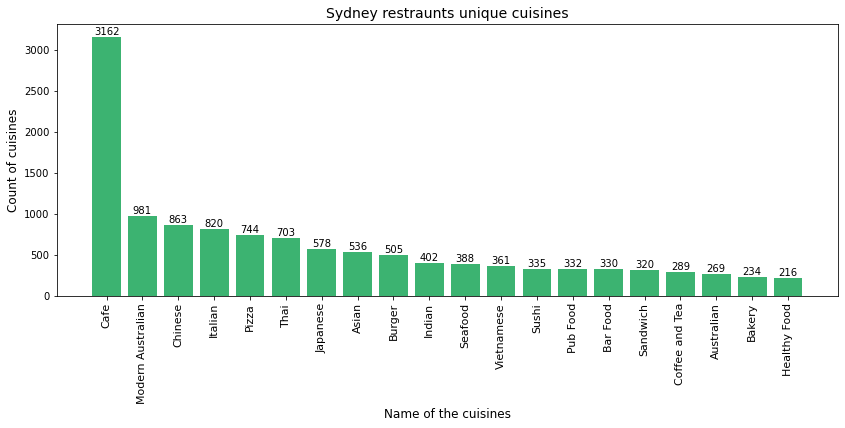

In [377]:
# Since we 134 unique cuisines, if we use a bar to plot to visualize the whole data, we won't be able to understnad
# the plot clearly. Hence, we will use the start_index and end_index to view the number of bars that we want to plot
# and see.

start_index = 0 # set start index
end_index = 20 # set end index

# Code for plotting the unique cuisines
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(unique_cuisine_count['cuisine_name'].values[start_index:end_index],    # x-axis values
       unique_cuisine_count['cuisine_counts'].values[start_index:end_index],  # y-axis values
       color = "mediumseagreen") # bar color
for container in ax.containers:            # for loop for printing bar labels
    ax.bar_label(container)
plt.xticks(rotation=90, size=11) # for printing the x-axis names in vertical order
ax.set_ylabel("Count of cuisines", size = 12)
ax.set_xlabel("Name of the cuisines", size = 12)
ax.set_title("Sydney restraunts unique cuisines", size = 14)

The above graph shows the top 20 unique cuisines offered by restraunts in Sydney. `Cafe` cuisine is offered by `3,162` restraunts followed by `Modern Australia` cuisine by `981` restraunts and `Chinese` cuisine by `863` restraunts.

#### (b) Which suburbs (top-3) have the highest number of restraunts?

In [378]:
restraunts_count = food_order_df['subzone'].value_counts(dropna=False).nlargest(3).rename_axis('suburb').reset_index(name='restraunt_count')
restraunts_count

suburb  restraunt_count
0          CBD              476
1  Surry Hills              260
2   Parramatta              225

The above table show the top 3 suburbs of the Sydney restraunts the total number of restraunts present in each suburb. 

Text(0.5, 1.0, 'Top 3 suburbs with highest number of restraunts')

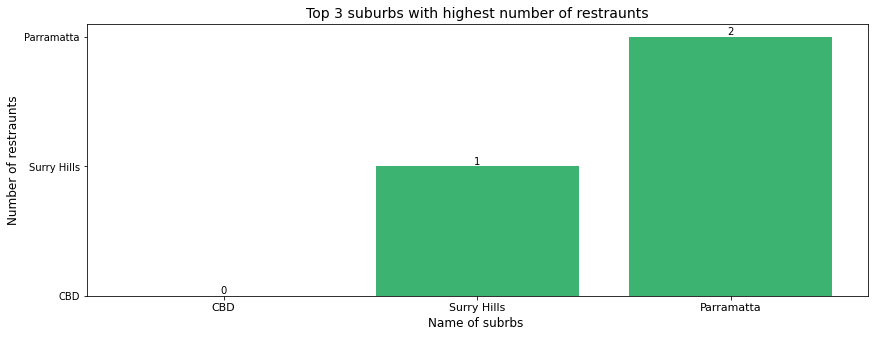

In [379]:
# Code for plotting the top-3 highest number of restraunts
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(restraunts_count['suburb'].values, # x-axis column
       restraunts_count['suburb'].values, # y-axis column
       color = "mediumseagreen")          # bar color
plt.xticks(rotation=0, size=11)           # To print x-axis ticks in horizontally
for container in ax.containers:           # for loop for print the bar coutns
    ax.bar_label(container)
ax.set_ylabel("Number of restraunts", size = 12)
ax.set_xlabel("Name of subrbs ", size = 12)
ax.set_title("Top 3 suburbs with highest number of restraunts", size = 14)

The above bar plot shows the top 3 subirbs with highest number of restraunts in Sydney. The `CBD` suburb has `476` restraunts followed by `Surry Hills` suburb with `260` and `Paramatta` suburb with `225` restraunts.

#### (c) "Restraunts with 'excellent' rating are mostly very expensive while those with 'Poor' rating are rarely expensive".

In [380]:
# To prove the statement, we will first filter the data based on rating. We will only select restraunts with either 
# Excellent rating or Poor rating. We will filter the dataset based on these two ratings and store it in a separate
# dataframe.
filter_df = food_order_df[(food_order_df['rating_text'] == ('Excellent')) | 
                          (food_order_df['rating_text'] == ('Poor'))]

# view the first few rows of the filtered dataframe.
filter_df.head(3)

address   cost  \
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   

                               cuisine        lat  \
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   
2                           [Japanese] -33.867971   
3                  [Modern Australian] -33.856784   

                                                link         lng  \
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   

          phone  rating_number rating_text  \
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   

                                 subzone                           title  \
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   

                     type   votes  groupon    color     cost_2 cuisine_color  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4

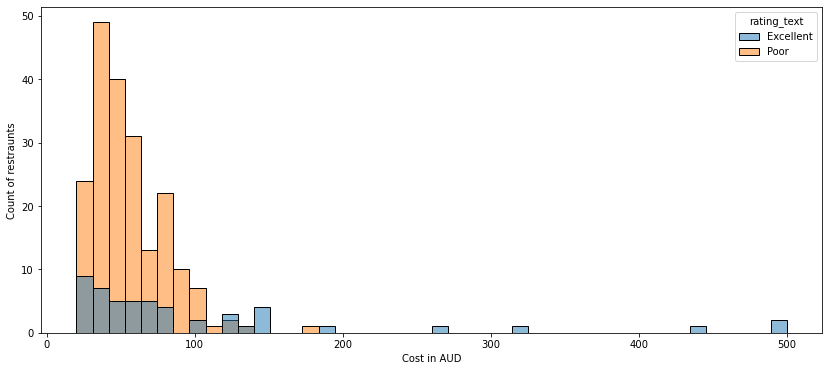

In [381]:
# Code for plotting the histogram plots
plt.figure(figsize = (14,6))
sns.histplot(data = filter_df, x = 'cost', hue = 'rating_text', kde = False)
plt.ylabel("Count of restraunts")
plt.xlabel("Cost in AUD")
plt.show()

According to the graph above, there are very few restraunts with excellent rating wich are expensive. The majority of the restraunts are in the range of 20 AUD to 120 AUD. We can also see one restraunt with poor rating which is closer to 180 AUD. Hence, the statement `"Restraunts with 'excellent' rating are mostly very expensive while those with 'Poor' rating are rarely expensive"` is not true.
***

#### 2. Perform Exploratory analysis for the variable of the data. This can be done by producing histograms and distribution plots and descriptive insights about these variables. This can be performed at least for the following variables.
    1. Cost
    2. Rating
    3. Type

### ------------- EDA for Cost -----------------

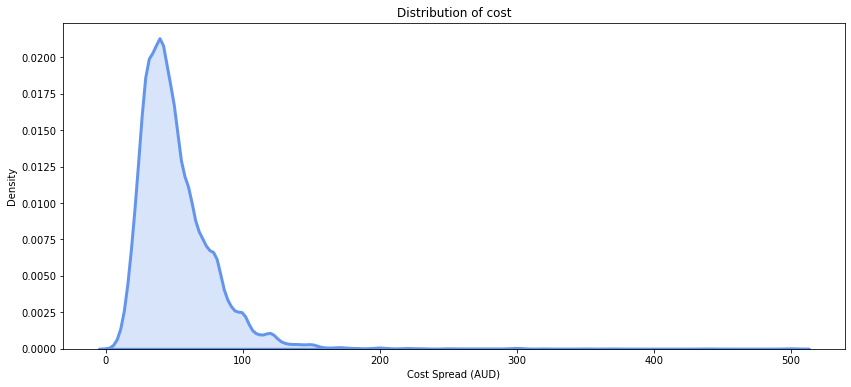

In [382]:
# Distribution plot for `cost` variable
plt.figure(figsize=(14,6))
sns.distplot(food_order_df["cost"],
            hist = False,
            kde_kws = {'shade': True, 'linewidth': 3},
            bins = 10, 
            kde = True, 
            color = "cornflowerblue")
plt.xlabel("Cost Spread (AUD)")
plt.ylabel("Density")
plt.title("Distribution of cost");

The distribution plot for `cost` shows that it is right skewed and the cost spread is from 10 AUD to 120 AUD.

### ------------- EDA for Rating -----------------

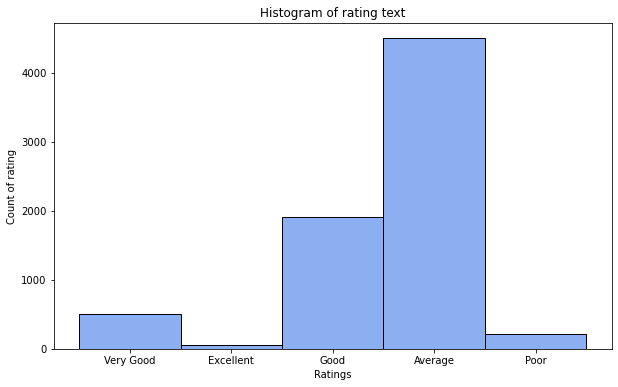

In [383]:
# Distribution plot for `rating_text` variable
plt.figure(figsize=(10,6))
sns.histplot(food_order_df['rating_text'], 
            bins = 10,
            color = "cornflowerblue")
plt.xlabel("Ratings")
plt.ylabel("Count of rating")
plt.title("Histogram of rating text");

The distribution plot for `rating_text` shows that there are more restraunts with `Average` rating followed by `Good` rating and `Very Good` rating.

### ------------- EDA for Cost vs Rating -----------------

In [384]:
# Box plot for understanding the relationship between 'rating_text' and 'cost' using 'plotly.express' 
fig = px.box(food_order_df, 
             x = "rating_text", 
             y = "cost",
             color_discrete_sequence = px.colors.qualitative.Prism,
             labels={
                     "cost": "Cost (AUD)",
                     "rating_text": "Rating"
                 },
             title = "Boxplot for rating text vs cost")
fig.show()

According to the boxplot above, the costs of all restaurants rated between `very good` to `poor` show a similar pattern. We see many outliers from restaurants rated `Very Good`, `Good` and `Average`. Restaurants with `Excellent` rating indicate that they are very expensive, but the average cost of all restaurants with different ratings appears to be similar. This Boxplot here helps us to understand how outliers spread across all categories of restaurants. The outliers are possibly due to the superior type of restaurant, the superior suburb in which the restaurant is located, and perhaps the dish being among the top 10-20 unique dishes.

### ------------- EDA for `type` variable -----------------

In [385]:
# For doing the exploratory data analysis for the `type` column, we will first create a copy of the `type` column 
# and store it as a separate data frame 

# copy the type column to a new data frame
restraunt_type_df = food_order_df[['type']].copy()

# check for null values
restraunt_type_df.isnull().sum()

type    48
dtype: int64

In [386]:
# since we null values in the dataframe, we will use mode() to get the values that we will be using for
# replacing the missing values
restraunt_type_df.mode()

type
0  ['Casual Dining']

In [387]:
# replace the missing value with
restraunt_type_df.fillna("['Casual Dining']",inplace=True)

In [388]:
# convert the type column from a string to a list
restraunt_type_df["type"] = restraunt_type_df["type"].apply(eval)

In [389]:
# Pass the list column for which we have to get the value counts
unique_restraunts_type = convert_to_1D(restraunt_type_df['type']).value_counts().rename_axis('restraunt_type').reset_index(name='restraunt_count')
unique_restraunts_type


restraunt_type  restraunt_count
0     Casual Dining             5614
1              Café             3169
2               Bar              692
3         Fast Food              587
4        Food Court              543
5               Pub              382
6            Bakery              174
7       Fine Dining              113
8          Wine Bar              106
9   Dessert Parlour               67
10    Beverage Shop               17
11       Food Truck               16
12             Club               12
13       Food Stall                2

In [390]:
# get the total number of unique restraunt types in Sydney
print("The total number of unique restraunt types in Sydney are " + str(len(unique_restraunts_type)))

The total number of unique restraunt types in Sydney are 14


Text(0.5, 1.0, 'Sydney restraunts unique type')

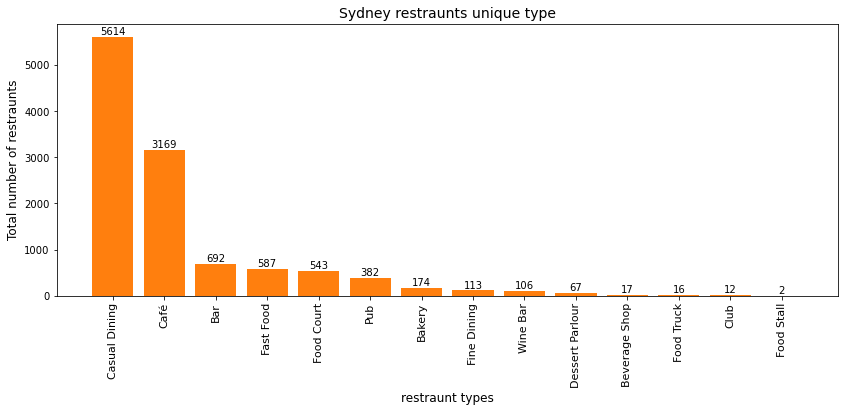

In [391]:
# plotting the bar plot of the unique restraunts type
start_index = 0 # set start index
end_index = 14 # set end index

# Code for plotting the unique cuisines
fig, ax = plt.subplots(figsize = (14,5))
ax.bar(unique_restraunts_type['restraunt_type'].values[start_index:end_index],
       unique_restraunts_type['restraunt_count'].values[start_index:end_index],
       color = "tab:orange")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90, size=11)
ax.set_ylabel("Total number of restraunts", size = 12)
ax.set_xlabel("restraunt types", size = 12)
ax.set_title("Sydney restraunts unique type", size = 14)

##### The majority of restaurants in Sydney are of the `Casual Dining` type, followed by `Cafe`, `Bar`, `Fast Food`, `Food Court`, and so on.

## 3. Cuisine Density Map

In [392]:
# import the library
import geopandas as gpd

# set the path for reading the sydney geojson file
sydney_GeoJSON_file_path = "data/sydney.geojson"

# read the sydney GeoJSON file
sydney_GeoJSON = gpd.read_file(sydney_GeoJSON_file_path)

In [393]:
# view the first few rows of the data
sydney_GeoJSON.head(3)

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...

In [394]:
# Upon viewing the data after reading the file, we see that there is a column SSC_NAME which is the name of the 
# Sydney suburbs.
sydney_GeoJSON.rename(columns = {'SSC_NAME':'suburb'}, inplace = True)

# check the GeoDataframe
sydney_GeoJSON.head(3)

SSC_CODE            suburb CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...

In [395]:
# check the shape of the sydney geojson dataframe
sydney_GeoJSON.shape

(494, 5)

<AxesSubplot:>

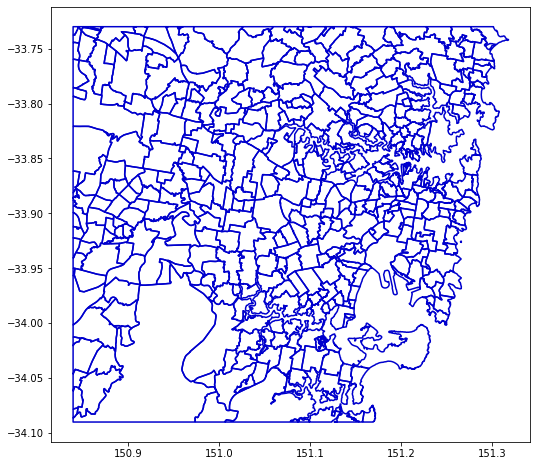

In [396]:
# We will now plot the Sydney GeoJSON dataframe to visualize it.
sydney_GeoJSON.boundary.plot(figsize=(14,8), color="mediumblue")

In [397]:
# we view the Coordinate Reference System of our GeoJSON dataframe.
sydney_GeoJSON.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:xlabel='lng', ylabel='lat'>

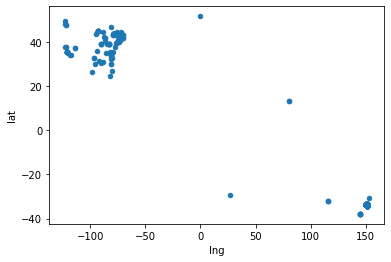

In [398]:
# if we try to plot the latitude and longitude using our dataframe and see the result
food_order_dataset.plot(kind="scatter", x="lng", y="lat")

Upon viewing the above scatter plot it doesn't gives us any meaningful information.

In [399]:
# Since our dataframe is a pandas dataframe, we will have to convert it to a GeoPandas dataframe 

# import the required library
from geopandas import points_from_xy

#food_order_df2 = pd.read_csv("data/zomato_df_final_data.csv")

# convert the food_order_dataset to GeoPandas dataframe
food_order_gdf = gpd.GeoDataFrame(
    food_order_dataset,
    crs = "EPSG:4326",
    geometry = points_from_xy(food_order_df["lng"],food_order_df["lat"]),
)

In [400]:
# view the food_order_gdf geopandas dataframe
food_order_gdf.head(3)

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   

                type   votes  groupon    color     cost_2 cuisine_color  \
0  ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1           ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2    ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   

                      geometry  
0  POINT (151.20760 -33.87606)  
1  POINT (151.19379 -33.91100)  
2  POINT (151.19521 -33.86797)

In [401]:
# lets view the data in the first row of cuisine column
food_order_gdf['cuisine'][0]

"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"

In [402]:
def show_cuisine_densitymap(cuisine_name):
    # filter the data based on the cuisine name and store it in a separate dataframe.
    cuisine_df = food_order_gdf[food_order_gdf['cuisine'].str.contains(cuisine_name)]
    
    # Now we will join the cuisine dataframe with the Sydney GeoJSON dataframe using spatial join
    cuisine_geojson_df = gpd.sjoin(
        cuisine_df,      # name of the filtered dataframe
        sydney_GeoJSON,  # name of the sydney geojson dataframe
        how = "left",    # left outer join
        op = "within",   
    )
    
    # we will group the data on "SSC_CODE" column store it in a separate dataframe
    cuisine_geojson_grouped_df = cuisine_geojson_df.groupby("SSC_CODE").size()
    
    # we will now reset the index and store it in a separate dataframe
    cuisine_geo_df = cuisine_geojson_grouped_df.to_frame().reset_index()
    
    # we rename the columns so that it is easier to understand
    cuisine_geo_df.columns = ["SSC_CODE", "listings_count"]
    
    # we now merge the sydney geojson dataframe with the 'cuisine_geo_df' dataframe
    # on 'SSC_CODE' column as outer join
    sydney_merged_areas = sydney_GeoJSON.merge(cuisine_geo_df, on = "SSC_CODE", how = "outer")
    
    # now we will plot the merged areas to see the plot
    fig, ax = plt.subplots(figsize = (12,10))
    sydney_GeoJSON.boundary.plot(ax = ax)
    sydney_merged_areas.plot(
        column = "listings_count", 
        cmap="GnBu",
        ax=ax,
        legend=True
    )
    plt.title(str(cuisine_name) + " cuisine density map")
#end of function

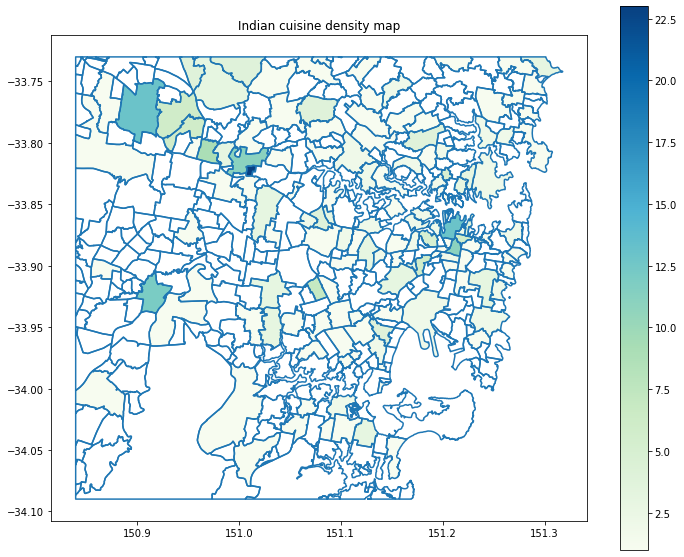

In [403]:
# set cuisine name for which you want to see the plot on the map
cuisine_name = "Indian"

# call the function to display the map
show_cuisine_densitymap(cuisine_name)

### 4. Tableau Dashboard

### The tableau dashboard has been provided as a separate file and it has also been uploaded on the Tableau Public

***

## Part B - Predictive Modelling

### I. Feature Engineering

#### 1. Perform Data Cleaning

In [404]:
# we will create a function for checking of the null values so that we can just reuse this function,
# instead of typing the code multiple times.

def getColsWithNan(data):
    # get the Null values from the dataframe that we just created in the above step.
    nullValues = data.isna()

    # this will return true for the columns which have null values
    NullCols = nullValues.any()

    # get the columns with the null values
    ColsWithNull = data.columns[NullCols].tolist()
    print(ColsWithNull)
#end of function

In [405]:
# call the function that we created above and pass the dataframe/dataset as the parameter in the function.
# getColsWithNan(food_ordering_df)
getColsWithNan(food_order_df)

['cost', 'lat', 'lng', 'rating_number', 'rating_text', 'type', 'votes', 'cost_2']


In [406]:
# Finding how many missing values are there for each column
food_order_df.isnull().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [407]:
# since rating_number is our target variable, we will romve the null values from this column
food_order_df = food_order_df[food_order_df['rating_number'].notnull()]

In [408]:
getColsWithNan(food_order_df)

['cost', 'lat', 'lng', 'type', 'cost_2']


In [409]:
# select numeric columns
df_numeric = food_order_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
#print(numeric_cols)

# Imputing numeric columns with the mean
food_order_df[numeric_cols] = food_order_df[numeric_cols].fillna(food_order_df[numeric_cols].mean())

In [410]:
# Imputing non-numeric column with the mode
food_order_df["type"].mode()

0    ['Casual Dining']
Name: type, dtype: object

In [411]:
food_order_df["type"].fillna("['Casual Dining']", inplace = True)

In [412]:
food_order_df["type"] = food_order_df["type"].apply(eval)

Now that we have imputted the values of the columns that we will be using in the next step, we take a look again and check if we still have any missing/null values remaining in the dataframe.

In [413]:
# call the function that we created above and pass the dataframe/dataset as the parameter in the function.
getColsWithNan(food_order_df)

[]


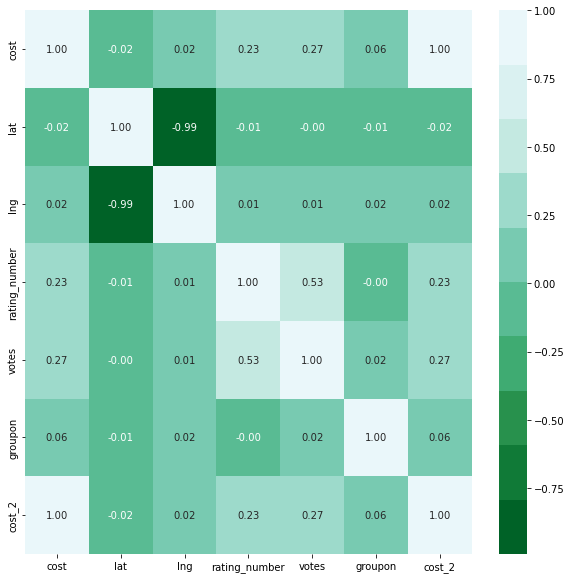

In [414]:
# We observe the correlations between Target variable and all other predictor variables(s) to check which 
# columns/features/predictors are actually related to the target variable in question.
corr_matrix = food_order_df.corr()

# Code for plotting correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))    # setting the figure size of the plot
colormap = sns.color_palette("BuGn_r", 10)  # set the color palate for the plot
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

#### 2. Feature Encoding

In [415]:
#food_ordering_df['log_cost'] = np.log(food_ordering_df['cost'])
food_order_df['log_votes'] = np.log(food_order_df['votes'])

In [416]:
# changing `rating_text` to ordinal for encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

food_order_df['groupon'] = label_encoder.fit_transform(food_order_df['groupon'])

food_ordering_encoder = label_encoder.fit(food_order_df['rating_text'])
food_ordering_encoder.classes_ = np.array(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
food_order_df['rating_text'] = food_ordering_encoder.transform(food_order_df['rating_text'])

Within a matrix where each variable is represented by a column, `LabelBinarizer` converts every variable into a binary.To put it another way, it will transform a list into a matrix with exactly the same number of columns as the unique value in the input set. And since in `type` column we have multiple values, we will use `MultiLabelBinarizer`.

In [417]:
from sklearn.preprocessing import MultiLabelBinarizer

MultiLabBin = MultiLabelBinarizer()

food_ordering_clean_df = food_order_df.join(
    pd.DataFrame(MultiLabBin.fit_transform(food_order_df['type']),
                   columns = MultiLabBin.classes_,
                   index = food_order_df['type'].index))

Since there is no description provided for this feature, `cost_2` can be removed. Additionally, the columns `color`, `cuisine_color`, `phone`, `link`, `title`, and `address` should be removed because they are not very useful.

In [418]:
# define the columns to be removed
columns_to_drop = ["color", "cost_2", "cuisine_color", "phone", "link", "title", "address", "cuisine", "lat", "lng", "subzone"]

# removing columns that are not required
food_ordering_clean_df.drop(columns_to_drop, inplace=True, axis=1)


In [419]:
# view the columns in the dataframe
food_ordering_clean_df.columns

Index(['cost', 'rating_number', 'rating_text', 'type', 'votes', 'groupon',
       'log_votes', 'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining',
       'Club', 'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

### II. Regression

In [420]:
# Since we have performed the one-hot encoding on the `type` column, we will drop this column and also all the
# categorical columns as well.
foodorderDf_Regression = food_ordering_clean_df.copy()
foodorderDf_Regression.drop(['type','votes'], inplace=True, axis=1)

In [421]:
# view the column names
foodorderDf_Regression.columns

Index(['cost', 'rating_number', 'rating_text', 'groupon', 'log_votes',
       'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining', 'Club',
       'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

### We do not use complete data to build the model. Some data is randomly selected and set aside to check the goodness of the model. This is called test data and the rest of the data is called training data on which the model is built. For this project, 80% of the data is used as training data and the remaining 20% as test data.

In [422]:
from sklearn.model_selection import train_test_split

X = foodorderDf_Regression.drop('rating_number', axis =1)
y = foodorderDf_Regression['rating_number'] #considering rating_number as the target variable

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [423]:
# check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5746, 17)
(5746,)
(1437, 17)
(1437,)


In [424]:
X_test.columns

Index(['cost', 'rating_text', 'groupon', 'log_votes', 'Bakery', 'Bar',
       'Beverage Shop', 'Café', 'Casual Dining', 'Club', 'Dessert Parlour',
       'Fast Food', 'Fine Dining', 'Food Court', 'Food Truck', 'Pub',
       'Wine Bar'],
      dtype='object')

### Model 1 : Linear Regression

In [425]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# After splitting the data into training and testing sets, finally, the time is to train our algorithm. 
# For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our 
# training data.
model_regression_1 = LinearRegression()  
model_regression_1.fit(X_train, y_train) #training the algorithm

# Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data 
# and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute 
# the following script:
y_pred = model_regression_1.predict(X_test)
y_pred

print()

# print the output on the screen
print('\nFor Linear Regression: ')
print('-----------------------------------------------')
print('Accuracy:', np.round_(model_regression_1.score(X_train, y_train), 4) * 100)
print('Mean Absolute Error:', np.round_(metrics.mean_absolute_error(y_test, y_pred), 4))  
print('Mean Squared Error:', np.round_(metrics.mean_squared_error(y_test, y_pred), 4))  
print('Root Mean Squared Error:', np.round_(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print('-----------------------------------------------')



For Linear Regression: 
-----------------------------------------------
Accuracy: 82.91
Mean Absolute Error: 0.1441
Mean Squared Error: 0.0345
Root Mean Squared Error: 0.1856
-----------------------------------------------


<AxesSubplot:xlabel='rating_number', ylabel='Density'>

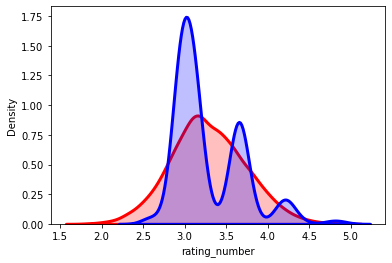

In [426]:
#Actual values vs Predicted values of rating number
ax = sns.distplot(foodorderDf_Regression['rating_number'], 
                 hist = False, color="r", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label="Actual Value")

sns.distplot(y_pred, hist = False, color="b", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label="Fitted Values", ax=ax)


### Model 2: Gradient Descent

In [427]:
# import the libraries for the gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Since we have split the data into training and testing sets, finally, the time is to train our algorithm. 
# For that, we need to import Gradient Desecent class, instantiate it, and call the fit() method along with our 
# training data.

model_regression_2 = make_pipeline(StandardScaler(), 
                                   SGDRegressor(max_iter=1000, tol=1e-3))

model_regression_2.fit(X_train, y_train) #training the algorithm


# Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data 
# and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute 
# the following script:
y_pred = model_regression_2.predict(X_test)
y_pred

# print the output on the screen
print('\nFor Gradient Descent: ')
print('-----------------------------------------------')
print('Accuracy:', np.round_(model_regression_2.score(X_train, y_train), 4) * 100)
print('Mean Absolute Error:', np.round_(metrics.mean_absolute_error(y_test, y_pred), 4))  
print('Mean Squared Error:', np.round_(metrics.mean_squared_error(y_test, y_pred), 4))  
print('Root Mean Squared Error:', np.round_(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print('-----------------------------------------------')




For Gradient Descent: 
-----------------------------------------------
Accuracy: 82.85
Mean Absolute Error: 0.1447
Mean Squared Error: 0.0347
Root Mean Squared Error: 0.1863
-----------------------------------------------


<AxesSubplot:xlabel='rating_number', ylabel='Density'>

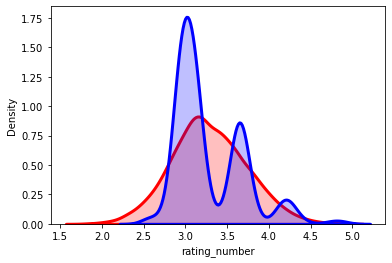

In [428]:
#Actual values vs Predicted values of rating number for Gradient Desecent
ax = sns.distplot(foodorderDf_Regression['rating_number'], 
                 hist = False, color="r", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label="Actual Value")

sns.distplot(y_pred, hist = False, color="b", kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label="Fitted Values", ax=ax)

### III. Classification

In [429]:
# Replacing all the Poor and Average to Poor and rest of the type to excellent. 
foodorderDf_Classification = food_ordering_clean_df.copy()
foodorderDf_Classification['rating_text'] = np.where((foodorderDf_Classification['rating_text'] == 0) | 
                                                     (foodorderDf_Classification['rating_text'] == 1), 0, 1)

In [430]:
# view the first few rows of the updated data frame of the `rating_text` column
foodorderDf_Classification['rating_text'].head(3)

0    1
1    1
2    1
Name: rating_text, dtype: int64

In [431]:
# view the last few rows of the updated data frame of the `rating_text` column
foodorderDf_Classification['rating_text'].tail(3)

9520     0
9596     0
10212    0
Name: rating_text, dtype: int64

In [432]:
# List of columns names before droppping the columns 
foodorderDf_Classification.columns

Index(['cost', 'rating_number', 'rating_text', 'type', 'votes', 'groupon',
       'log_votes', 'Bakery', 'Bar', 'Beverage Shop', 'Café', 'Casual Dining',
       'Club', 'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

In [433]:
# we will drop the following columns
foodorderDf_Classification.drop(['type', 'rating_number', 'log_votes'], inplace=True, axis=1)

In [434]:
# List of columns names after droppping the columns 
foodorderDf_Classification.columns

Index(['cost', 'rating_text', 'votes', 'groupon', 'Bakery', 'Bar',
       'Beverage Shop', 'Café', 'Casual Dining', 'Club', 'Dessert Parlour',
       'Fast Food', 'Fine Dining', 'Food Court', 'Food Truck', 'Pub',
       'Wine Bar'],
      dtype='object')

In [435]:
# import the library
from sklearn.model_selection import train_test_split

X = foodorderDf_Classification.drop('rating_text', axis =1)
y = foodorderDf_Classification['rating_text'] #considering rating_text as the target variable

# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [436]:
#Normalize the data for numerical stability
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [437]:
classifier_models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_models['Logistic_Regression'] = LogisticRegression()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_models['Naive Bayes'] = GaussianNB()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier_models['Decision_Trees'] = DecisionTreeClassifier()

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
classifier_models['Gradient_Boosting'] = GradientBoostingClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_models['Random_Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier_models['K_Nearest_Neighbor'] = KNeighborsClassifier()


In [438]:
# importing the required library
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# define empty data dictionaries
accuracy, precision, recall, ConfMatx = {}, {}, {}, {}

# for loop for looping through all the classifications models and storing them in a data dictionary
for key in classifier_models.keys():
    
    # Fit the classifier
    classifier_models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = classifier_models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    
    # Prepare Confusion Matrix for each model
    ConfMatx[key] = confusion_matrix(y_test, predictions, labels = classifier_models[key].classes_)

In [439]:
# converting the datadictionary to a pandas dataframe to view the confusion matrix
classificationmodel_df = pd.DataFrame(index = classifier_models.keys(), 
                                      columns = ['Accuracy', 'Precision', 'Recall', 'ConfMatrix'])
classificationmodel_df['Accuracy'] = accuracy.values()
classificationmodel_df['Precision'] = precision.values()
classificationmodel_df['Recall'] = recall.values()
classificationmodel_df['ConfMatrix'] = ConfMatx.values()
classificationmodel_df

Accuracy  Precision    Recall                ConfMatrix
Logistic_Regression  0.838553   0.629167  0.848315   [[903, 54], [178, 302]]
Naive Bayes          0.665971   0.000000  0.000000      [[957, 0], [480, 0]]
Decision_Trees       0.780793   0.691667  0.665331  [[790, 167], [148, 332]]
Gradient_Boosting    0.856646   0.841667  0.756554   [[827, 130], [76, 404]]
Random_Forest        0.807933   0.745833  0.699219  [[803, 154], [122, 358]]
K_Nearest_Neighbor   0.805846   0.720833  0.704684  [[812, 145], [134, 346]]

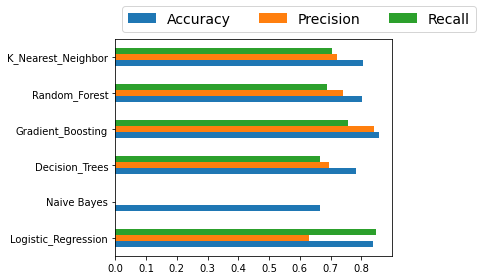

In [440]:
# plot for plotting the accuracy, precision and recall of all the classifiers
ax = df_model.plot.barh()
ax.legend(
    ncol=len(classifier_models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

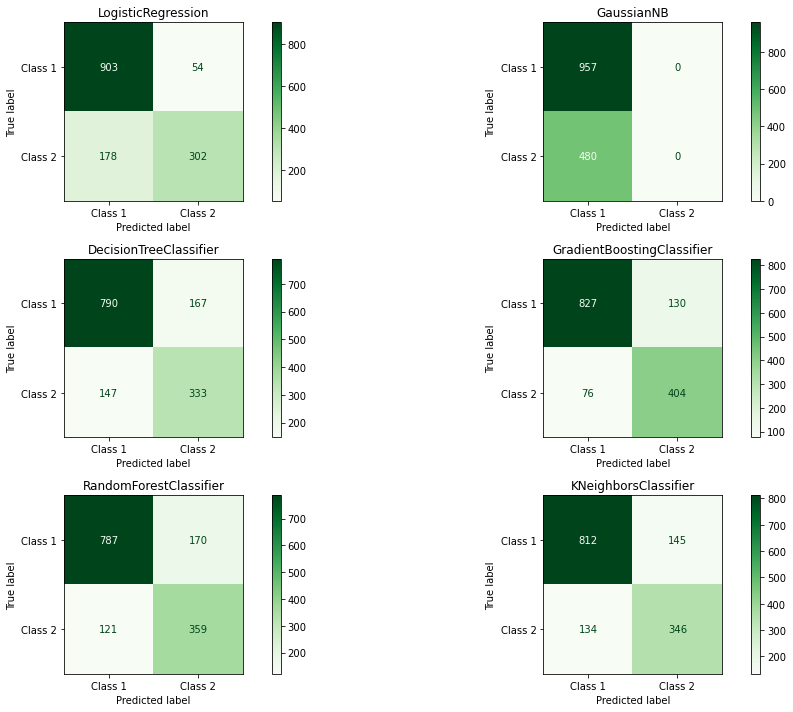

In [441]:
# for plotting the confusion matrix plot of all the classificaiton models used
from sklearn.metrics import plot_confusion_matrix

# set the figure size for all the plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

#temp_list = ["Poor", "Average", "Good", "Very Good", "Excellent"]

# list all the classifiers that have been used in this classifcation 
classifiers = [LogisticRegression(),
               GaussianNB(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier()
              ]


for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(X_train, y_train)
    predictions = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Greens',
                         display_labels=cls.classes_)
    ax.title.set_text(type(cls).__name__)
    ax.xaxis.set_ticklabels(['Class 1', 'Class 2'])
    ax.yaxis.set_ticklabels(['Class 1', 'Class 2'])
    
plt.tight_layout()  
plt.show()

## Conclusion:

### 1. On comparing the accuracy score of all the classifications models, the Gradient Boosting classificaiton model has the better accuracy score of 85.66% followed by Logisitic regression classificaiton model at 83.85%. The Naive Bayes classification model had the lowest accuracy score of 66.59% among all the models. 

### 2. So, Gradient Boosting classification model is more suited for classifying the Sydney restraunts. Also the `precision` score of `0.841667` is much better when compared with other models.

## References

1. https://uclearn.canberra.edu.au/courses/12503/modules

2. https://scikit-learn.org/stable/auto_examples/index.html#examples

2. https://scikit-learn.org/stable/auto_examples/index.html#classification